# Unsupervised Machine Learning
This type of learning the model is trained on data that does not have labelled responses.The main is to uncover hidden patterns, structures or relationships within the data.

## Types of Unsupervised Learning
### Clustering 
The GOAL is to Group similar Data Points together based on their similar features. E,g Safaricom Customers have been grouped into:

a) SMS Services: Send Promotional SMS updates that only target these customers.

b) Call Services

c) Bundles Subscribers

#### Clustering using the Following Algorithms:

- K-Means: Where the groupings is done based on similarities of the Mean e,g Mean Age. This ONLY work on Numerical Data.

- K-Mode: Grouped based on Categorical data e,g Gender, Location...

- K-Prototype: Grouping is done based on BOTH Numerical(Mean) and Categorical(Mode)

#### Applications of Clustering Include:

- Marget/Customer Segmentation.

- Image Segmentation

- Social Network Analyis

### Association Rule Mining
Checking relationship between Variables using a concepts called Basket Analysis.

### Real life scenarios of using clustering
- Customer Segmentation – grouping customers based on behavior or purchase patterns.

- Image Segmentation – separating objects within an image.

- Anomaly Detection – identifying unusual data points in datasets.

- Document or News Categorization – grouping similar documents or news articles.

## Clustering
### Customer segmentation: Grouping customers based on their similar purchasing behaviour

In [1]:
# Step 1: Read the mall customers data

# install libraries
# The exclamation mark `!` before `pip` is used in Jupyter Notebook to run shell commands directly from a notebook cell
# !pip install kagglehub 
# !pip install pandas

# import libraries
import kagglehub
import os
import pandas as pd

/home/harris/Documents/Martial Jenga Labs/unsupervised-learning-lab/.venv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
# Get path
path = kagglehub.dataset_download("vjchoudhary7/customer-segmentation-tutorial-in-python")

print("Path to dataset files:", path)
print(os.listdir(path))

file_path = os.path.join(path, "Mall_Customers.csv")
print("File path: ", file_path)

# Read file
data = pd.read_csv(file_path)
data

Path to dataset files: /home/harris/.cache/kagglehub/datasets/vjchoudhary7/customer-segmentation-tutorial-in-python/versions/1
['Mall_Customers.csv']
File path:  /home/harris/.cache/kagglehub/datasets/vjchoudhary7/customer-segmentation-tutorial-in-python/versions/1/Mall_Customers.csv


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [3]:
# Step 2: Data transformation
#  Check and remove empty/ missing records

data.isnull().sum() # Detect

# remove empty records
data.dropna(inplace=True)

In [ ]:
# Step 3: Unsupervised ML
# Create a variable X to store our features - Age, Income, Spending
# NB. There is no y

array = data.values
print("Shape: ", array.shape)
# print(array)

X = array[ : , 2:]
print("Features(X): ", X)
print("Features(X) shape: ", X.shape)

Shape:  (200, 5)
Features(X):  [[19 15 39]
 [21 15 81]
 [20 16 6]
 [23 16 77]
 [31 17 40]
 [22 17 76]
 [35 18 6]
 [23 18 94]
 [64 19 3]
 [30 19 72]
 [67 19 14]
 [35 19 99]
 [58 20 15]
 [24 20 77]
 [37 20 13]
 [22 20 79]
 [35 21 35]
 [20 21 66]
 [52 23 29]
 [35 23 98]
 [35 24 35]
 [25 24 73]
 [46 25 5]
 [31 25 73]
 [54 28 14]
 [29 28 82]
 [45 28 32]
 [35 28 61]
 [40 29 31]
 [23 29 87]
 [60 30 4]
 [21 30 73]
 [53 33 4]
 [18 33 92]
 [49 33 14]
 [21 33 81]
 [42 34 17]
 [30 34 73]
 [36 37 26]
 [20 37 75]
 [65 38 35]
 [24 38 92]
 [48 39 36]
 [31 39 61]
 [49 39 28]
 [24 39 65]
 [50 40 55]
 [27 40 47]
 [29 40 42]
 [31 40 42]
 [49 42 52]
 [33 42 60]
 [31 43 54]
 [59 43 60]
 [50 43 45]
 [47 43 41]
 [51 44 50]
 [69 44 46]
 [27 46 51]
 [53 46 46]
 [70 46 56]
 [19 46 55]
 [67 47 52]
 [54 47 59]
 [63 48 51]
 [18 48 59]
 [43 48 50]
 [68 48 48]
 [19 48 59]
 [32 48 47]
 [70 49 55]
 [47 49 42]
 [60 50 49]
 [60 50 56]
 [59 54 47]
 [26 54 54]
 [45 54 53]
 [40 54 48]
 [23 54 52]
 [49 54 42]
 [57 54 51]
 [3

### The Elbow Method for Choosing Optimal Clusters

The **Elbow Method** is a heuristic used to determine the optimal number of clusters in a **K-Means clustering algorithm**.  
It involves plotting the **explained variation** (or **inertia**) as a function of the number of clusters and selecting the point where the rate of decrease sharply changes — known as the **"elbow"** point.

The explained variation is measured using the **Within-Cluster Sum of Squares (WCSS)**, also referred to as the **Sum of Squared Distances** between the data points and their assigned cluster centers.

#### **Intuition Behind the Elbow Method**
- As the number of clusters increases, the **WCSS decreases**, since data points are assigned to clusters that better fit them.
- However, after a certain number of clusters, the **improvement in WCSS reduction becomes marginal**.
- The point at which this reduction starts to level off forms an **elbow shape** in the plot.
- This **"elbow" point** is considered the **optimal number of clusters**, balancing model simplicity and accuracy.


In [ ]:
# We reached the Optimal Number, when the inertial is lower, Normally near the Elbow Arm.

from sklearn.cluster import KMeans
inertias = []
for k in range(2, 15):
  model = KMeans(n_clusters=k, random_state=42)
  model.fit(X)
  inertias.append(model.inertia_)

print(inertias)

[221087.1962719298, 158744.97108013937, 104366.151455562, 97211.84353980476, 68275.94428646985, 51448.36126259324, 44640.02804853042, 42081.855308685306, 38378.738907932086, 36521.06627366098, 35243.348813343524, 32308.587172476648, 29711.159791524264]


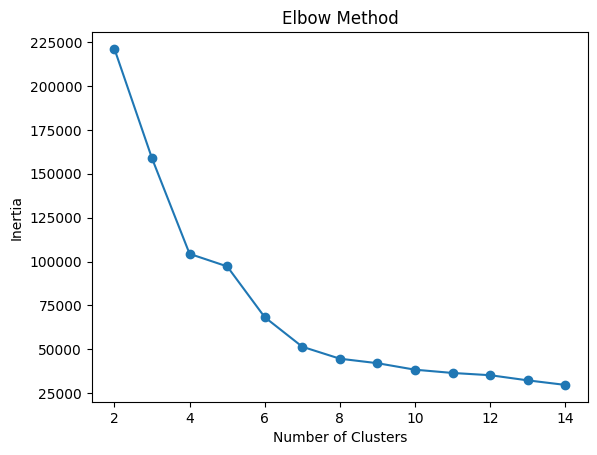

In [20]:
# # PLOT THE INERTIAS AS AN ELBOW
# Plot using matplotlib
import matplotlib.pyplot as plt

plt.plot(range(2, 15), inertias, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

In [41]:
# Plot using plotly
import plotly.express as px
import pandas as pd

k_values = list(range(2, 15))
df = pd.DataFrame({'No. of Clusters (k)': k_values, 'Inertia': inertias})

# Create an interactive line plot
fig = px.line(
    df,
    x='No. of Clusters (k)',
    y='Inertia',
    title='Elbow Method (Interactive)',
    markers=True,
)

# Customize appearance
fig.update_traces(marker=dict(size=6))
fig.update_layout(
    xaxis_title='Number of Clusters (k)',
    yaxis_title='Inertia',
    template='plotly_white'
)

# Show interactive plot
# fig.show()
fig.show(renderer="browser")



In [11]:
# Step 4: Import the clustering algorithm and fit the X data
# Make use of KMeans algorithm: It clusters groups by the nearest mean
# The goal is to partition the dataset into k clusters such that data points within each cluster are more similar to each other than to those in other clusters.

# !pip install scikit-learn

from sklearn.cluster import KMeans

In [42]:
# Elbow method: Determines the optimum clusters
model = KMeans(n_clusters=7, random_state=42)
model.fit(X)

,n_clusters,7
,init,'k-means++'
,n_init,'auto'
,max_iter,300
,tol,0.0001
,verbose,0
,random_state,42
,copy_x,True
,algorithm,'lloyd'


In [43]:
# Step 5: Generate the cluster means(K)

centroids = model.cluster_centers_
centroids

array([[ 56.34090909,  53.70454545,  49.38636364],
       [ 33.        , 114.71428571,  78.42857143],
       [ 25.52173913,  26.30434783,  78.56521739],
       [ 41.64705882,  88.73529412,  16.76470588],
       [ 32.625     ,  80.375     ,  82.9375    ],
       [ 44.31818182,  25.77272727,  20.27272727],
       [ 27.31578947,  57.5       ,  48.44736842]])

In [44]:
#  Step 6: Store the centroids in a dataframe

centroids_dataframe = pd.DataFrame(centroids, columns=["Customer Age", "Annual Income", "Spending Score"])
centroids_dataframe

,Customer Age,Annual Income,Spending Score
0,56.340909,53.704545,49.386364
1,33.000000,114.714286,78.428571
2,25.521739,26.304348,78.565217
3,41.647059,88.735294,16.764706
4,32.625000,80.375000,82.937500
5,44.318182,25.772727,20.272727
6,27.315789,57.500000,48.447368


In [45]:
# Step 7: Assign members to their corresponding cluster

data["Cluster"] = model.labels_
data

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,Male,19,15,39,5
1,2,Male,21,15,81,2
2,3,Female,20,16,6,5
3,4,Female,23,16,77,2
4,5,Female,31,17,40,5
...,...,...,...,...,...,...
195,196,Female,35,120,79,1
196,197,Female,45,126,28,3
197,198,Male,32,126,74,1
198,199,Male,32,137,18,3


In [16]:
# Generating members of the same cluster
# Cluster 3 members

cluster_3 = data[data["Cluster"] == 3]
cluster_3

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
124,125,Female,23,70,29,3
126,127,Male,43,71,35,3
128,129,Male,59,71,11,3
130,131,Male,47,71,9,3
132,133,Female,25,72,34,3
134,135,Male,20,73,5,3
136,137,Female,44,73,7,3
138,139,Male,19,74,10,3
140,141,Female,57,75,5,3
142,143,Female,28,76,40,3
